<a href="https://colab.research.google.com/github/lakatosgabor/OpenCV_gyakorlat/blob/main/1_konzultacio_3_resz_hisztogram_transzformacio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. OpenCV importálás
A kódolás megkezdése előtt érdemes az Open CV verzióját lekérni.
Egyrészt meg kell vizsgálnunk, hogy létezik-e a futtatókörnyezetben, másrészt az egyes függvényhívások, és a függvények paraméterezései verziónként eltérő lehet.

Ha nem áll rendelkezésre, hozz létre egy kód blokkot a bal felső sarokban található " + Kód " gommbal, majd futtasd a követező parancsot:

```
!pip install opencv-python-headless
```


In [1]:
import cv2 as cv
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
import numpy as np

# OpenCV verziójának lekérdezése
versionOfOpenCV = cv.__version__
print("OpenCV verzió: " + versionOfOpenCV)

OpenCV verzió: 4.8.0


#2. Drive csatlakoztatása

Futtasd az alábbi kódot a Google Drive tárhely csatlkoztatásához.
Add meg a Google által kért engedélyeket.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#3. Kép betöltése Google Drive-ból
A Drive-ba feltölött fájlokat a "/content/drive/MyDrive/" útvonal alatt érhetjük el. Az útvonal megtekinthető a bal oldali File Expoler-ben. Egy adott fájlt javasolt először kikeresni az Expolerben, majd jobb gombbal kattintva másoljuk ki a fájl elérési útvonalát. Ezáltal elkerülhetjük az elgépeléseket.

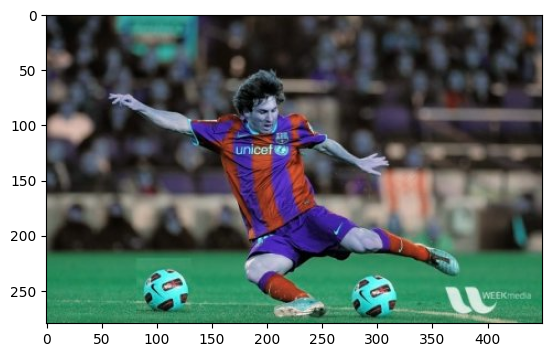

In [ ]:
# Beolvassa a képet a megadott elérési útról, és színes képként tárolja el a src változóban.
src = cv.imread("/content/drive/MyDrive/opencv/images/messi.jpg", cv.IMREAD_COLOR)
plt.imshow(src)

# 4. Szűrők alkalmazása

integral:  3968773


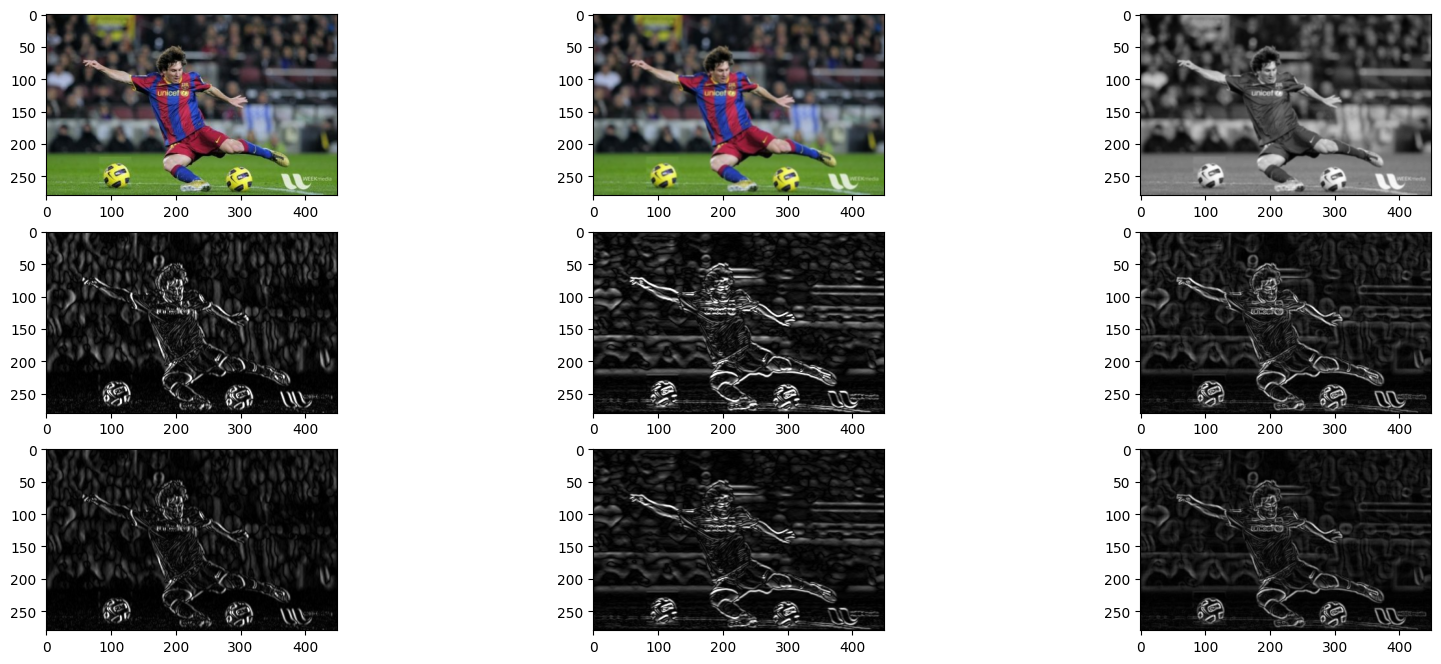

In [ ]:
# scale, delta és ddepth változók inicializálása
scale = 1
delta = 0
ddepth = cv.CV_16S

# Prewitt élek szűrőmátrixainak definiálása
kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])

# Gauss-simítás alkalmazása a bemeneti képre
blur = cv.GaussianBlur(src, (3, 3), 0)

# Kép konvertálása szürkeárnyalatosra
gray = cv.cvtColor(blur, cv.COLOR_BGR2GRAY)

# x és y irányú élek kiszámítása a Sobel szűrővel
grad_x = cv.Sobel(gray, ddepth, 1, 0, ksize=3, scale=scale, delta=delta, borderType=cv.BORDER_DEFAULT)
grad_y = cv.Sobel(gray, ddepth, 0, 1, ksize=3, scale=scale, delta=delta, borderType=cv.BORDER_DEFAULT)

# Abszolút élek kiszámítása mindkét irányban
abs_grad_x = cv.convertScaleAbs(grad_x)
abs_grad_y = cv.convertScaleAbs(grad_y)

# Az abszolút élek összeadása az élek magnitúdójának számításához
grad = cv.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)

integral = cv.integral(grad)[-1, -1]
print("integral: ", integral)

# Prewitt élek kiszámítása a kernelx és kernely szűrőmátrixokkal
prewittx = cv.filter2D(gray, ddepth, kernelx)
prewitty = cv.filter2D(gray, ddepth, kernely)

abs_prew_x = cv.convertScaleAbs(prewittx)
abs_prew_y = cv.convertScaleAbs(prewitty)

# Prewitt élek összeadása
prew = cv.addWeighted(abs_prew_x, 0.5, abs_prew_y, 0.5, 0)

# Alábrázolás (subplot) inicializálása a megjelenítéshez
f, axs = plt.subplots(3, 3, figsize=(20, 8))

# Eredeti kép megjelenítése
plt.subplot(331), plt.imshow(cv.cvtColor(src, cv.COLOR_BGR2RGB))

# Gauss-simítás utáni kép megjelenítése
plt.subplot(332), plt.imshow(cv.cvtColor(blur, cv.COLOR_BGR2RGB))

# Szürkeárnyalatos kép megjelenítése
plt.subplot(333), plt.imshow(gray, 'gray')

# Abszolút élek megjelenítése az x irányban
plt.subplot(334), plt.imshow(abs_grad_x, 'gray')

# Abszolút élek megjelenítése az y irányban
plt.subplot(335), plt.imshow(abs_grad_y, 'gray')

# Az élek magnitúdójának megjelenítése
plt.subplot(336), plt.imshow(grad, 'gray')

# Prewitt élek megjelenítése az x irányban
plt.subplot(337), plt.imshow(abs_prew_y, 'gray')

# Prewitt élek megjelenítése az y irányban
plt.subplot(338), plt.imshow(abs_prew_x, 'gray')

# Prewitt élek összeadott eredményének megjelenítése
plt.subplot(339), plt.imshow(prew, 'gray')

# Az eredmények megjelenítése
plt.show()

# A kép élesítése

In [3]:
def kep_elesites(src):
  ddepth = cv.CV_16S
  scale = 1
  delta = 0
  src = cv.imread(src, cv.IMREAD_GRAYSCALE)


  kernel1 = np.array([[-1,-1,-1],[-1,9,-1],[-1,-1,-1]])
  filtered = cv.filter2D(src, -1, kernel1)

  # x és y irányú gradiens kiszámítása a Sobel szűrővel
  grad_x = cv.Sobel(filtered, ddepth, 1, 0, ksize=3, scale=scale, delta=delta, borderType=cv.BORDER_DEFAULT)
  grad_y = cv.Sobel(filtered, ddepth, 0, 1, ksize=3, scale=scale, delta=delta, borderType=cv.BORDER_DEFAULT)

  # Abszolút gradiens kiszámítása mindkét irányban
  abs_grad_x = cv.convertScaleAbs(grad_x)
  abs_grad_y = cv.convertScaleAbs(grad_y)

  # Az abszolút gradiens összeadása az gradiens magnitúdójának számításához
  grad = cv.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)

  #Az eredmény kép pixelértékeinek összeadása
  integral = cv.integral(grad)[-1, -1]
  return integral

In [4]:
from google.colab import files
import cv2
import numpy as np
from IPython.display import Image, display

# Fájl kiválasztása a felhasználótól
uploaded = files.upload()

files = [];
# Feltöltött képek feldolgozása OpenCV segítségével
for filename in uploaded.keys():
  files.append(filename)

print(files)

Saving peppers.jpg to peppers.jpg
Saving peppers_blur.jpg to peppers_blur.jpg
['peppers.jpg', 'peppers_blur.jpg']


In [5]:
for image in files:
  print(image, kep_elesites(image))

17528498
8976727
